In [1]:
# MNIST 데이터셋 사용
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./mnist/data/', one_hot=True)

W0725 15:56:40.120154 4598994368 deprecation.py:323] From <ipython-input-1-6afd7b0cdff5>:4: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0725 15:56:40.120924 4598994368 deprecation.py:323] From /usr/local/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0725 15:56:40.121573 4598994368 deprecation.py:323] From /usr/local/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [2]:
# 28 x 28 = 784개의 특징으로 이뤄져있다
# 레이블은 0부터 9까지이므로 10개의 분류로 나누면 된다.
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

**미니배치(minibatch)** : 데이터를 적당한 크기로 잘라서 학습시키는 방법
위의 코드에서 None으로 되어 있는 부분이 한 번에 학습시킬 MNIST 이미지의 개수를 지정하는 값이 들어간다. 즉 배치 크기를 지정하는 자리이다.
이 자리에 정확히 명시해줘도 되지만 None으로 넣어주면 텐서플로가 알아서 계산한다.

</br>

이제 2개의 은닉층이 다음처럼 구성된 신경망을 만들어보겠습니다.
784(입력, 특징 개수) -> 256(첫 번째 은닉층 뉴런 개수) -> 256(두 번째 은닉층 뉴런 개수) -> 10(결괏값 0~9 분류개수)

In [3]:
W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))

# 표준 편차가 0.01인 정규 분포를 가지는 임의의 값으로 뉴런(변수)을 초기화시킨다.
W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L2, W3)

In [4]:
# tf.nn.softmax_cross_entropy_with_logits : 각 이미지에 대한 손실값을 구함
# tf.train.AdamOptimizer : 이 손실값을 최소화하는 최적화를 수행하도록 그래프 구성
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [5]:
# 신경망 모델 초기화하고 학습 진행할 세션 시작
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 학습용 데이터와 테스트용 데이터
**학습 데이터** : 학습을 시킬 때 사용하는 데이터 

**테스트 데이터** : 학습이 잘 되었는지 확인하는 데이터

In [6]:
# 미니배치의 크기를 100으로 설정
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

In [7]:
for epoch in range(1):
    total_cost = 0
    
    # 미니배치의 총 개수만큼 반복하여 학습한다.
    for i in range(total_batch):
        # mnist.train.next_batch(batch_size) : 학습할 데이터를 배치 크기만큼
        # 가져온 뒤, 입력값인 이미지 데이터는 batch_xs에,
        # 출력값인 레이블 데이터는 batch_ys에 저장한다.
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        
        # 최적화시키고 손실값을 가져와서 저장한다.
        _, cost_val = sess.run([optimizer, cost],
            feed_dict={X: batch_xs, Y: batch_ys})
        
        total_cost += cost_val
        
    print('Epoch: ', '%04d' %(epoch + 1),
         'Avg. cost = ', '{:.3f}' .format(total_cost/total_batch))
    
print('최적화 완료!')

Epoch:  0001 Avg. cost =  0.421
최적화 완료!


In [8]:
# 예측 결과인 model의 값과 실제 레비을인 Y의 값을 비교한다.
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
print(is_correct)

Tensor("Equal:0", shape=(?,), dtype=bool)


In [9]:
# tf.cast : is_correct를 0과 1로 변환한다.
# 변환한 값들을 tf.reduce_mean을 이용해 평균을 낸 값이 정확도가 된다.
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도', sess.run(accuracy, feed_dict={X: mnist.test.images,
                                          Y: mnist.test.labels}))

정확도 0.9437


# 드롭아웃
**과적합** : 학습한 결과가 학습 데이터에는 매우 잘 맞지만, 학습 데이터에만 너무 꼭 맞춰져 있어서 그외의 데이터에는 잘 맞지 않는 상황
* 과적합 문제를 해결하기 위한 방법 중에 하나가 **드롭아웃**이다.

</br>

## 드롭아웃의 원리
학습 시 전체 신경망 중 일부만을 사용하도록 하는 것이다. 즉, 학습 단계마다 일부 뉴런을 제거함으로써, 일부 특징이 특정 뉴런들에게 고정되는 것을 막아 가중치의 균형을 잡도록 한다.

In [10]:
### 학습이 끝난 뒤의 예측 시에는 신경망 전체를 사용하도록 해줘야하기 때문에
# keep_prob라는 플레이스홀더를 만들어 학습 시에는 0.8을 넣고
# 예측 시에는 1을 넣어 신경망 전체를 사용하도록 한다.
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))
# tf.nn.dropout의 두 번째 파라미터는 뉴런의 비율이다.
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))
L2 = tf.nn.dropout(L2, keep_prob)

# 학습 코드: keep_prob를 0.8로 넣어줌
_, cost_val = sess.run([optimizer, cost],
                      feed_dict={X: batch_xs,
                                Y: batch_ys,
                                keep_prob: 0.8})

# 예측 코드: keep_prob를 1로 넣어줌
print('정확도: ', sess.run(accuracy,
                       feed_dict={X: mnist.test.images,
                                 Y: mnist.test.labels,
                                 keep_prob: 1}))

W0725 15:56:41.471375 4598994368 deprecation.py:506] From <ipython-input-10-53b80e3f12d6>:9: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


정확도:  0.945


# matplotlib
**matplotlib** : 시각화를 위해 그래프를 쉽게 그릴 수 있도록 해주는 파이썬 라이브러리이다.

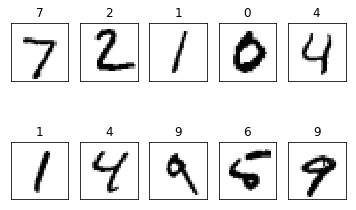

In [12]:
import matplotlib.pyplot as plt
import numpy as np
# 테스트 데이터를 이용해 예측 모델을 실행하고 결괏값을 labels에 저장
labels = sess.run(model,
                 feed_dict={X: mnist.test.images,
                           Y: mnist.test.labels,
                           keep_prob: 1})

# 손글씨를 출력할 그래프
fig = plt.figure()

for i in range(10):
    # 2행 5열의 그래프를 만들고, i+1 번 째에 숫자 이미지를 출력한다.
    subplot = fig.add_subplot(2, 5, i + 1)
    # 이미지를 깨끗하게 출력하기 위해 x와 y의 눈금을 출력하지 않는다.
    subplot.set_xticks([])
    subplot.set_yticks([])
    # 출력한 이미지 위에 예측한 숫자를 출력한다.
    # np.argmax는 tf.argmax와 같은 기능의 함수이다.
    # 결과값인 labels의 i번째 요소가 원-핫 인코딩 형식으로 되어 있으므로,
    # 해당 배열에서 가장 높은 값을 가진 인덱스를 예측한 숫자로 출력한다.
    subplot.set_title('%d' %np.argmax(labels[i]))
    # 1차원 배열로 되어 있는 i번째 이미지 데이터를
    # 28 * 28 형식의 2차원 배열로 변형하여 이미지 형태로 출력한다
    # cmap 파라미터를 통해 이미지를 그레이스케일로 출력한다.
    subplot.imshow(mnist.test.images[i].reshape((28, 28)),
                   cmap=plt.cm.gray_r)

# 그래프 출력
plt.show()